## 3.4　CBOW モデルの実装

In [1]:
import os
import sys
import numpy as np

In [2]:
os.chdir('/Users/yuta.shimizu/Downloads/ML/deep-learning-from-scratch-2-master/ch03')
sys.path.append(os.pardir)

In [3]:
from common.trainer import Trainer
from common.optimizer import Adam
from simple_cbow import SimpleCBOW
from common.layers import MatMul, SoftmaxWithLoss
from common.util import preprocess, create_contexts_target, convert_one_hot

In [4]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size
        
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')
        
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()
        
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads
            
        self.word_vecs = W_in
        
    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss
    
    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

### 3.4.1　学習コードの実装

In [5]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size=1)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

In [6]:
print(contexts.shape)
print(target.shape)

(6, 2, 7)
(6, 7)


| epoch 1 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 2 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 3 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 4 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 5 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 6 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 7 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 8 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 9 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 10 |  iter 1 / 2 | time 0[s] | loss 1.95
| epoch 11 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 12 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 13 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 14 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 15 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 16 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 17 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 18 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 19 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 20 |  iter 1 / 2 | time 0[s] | loss 1.94
| epoch 21 |  iter 1 / 2 | ti

| epoch 327 |  iter 1 / 2 | time 0[s] | loss 0.90
| epoch 328 |  iter 1 / 2 | time 0[s] | loss 0.87
| epoch 329 |  iter 1 / 2 | time 0[s] | loss 0.90
| epoch 330 |  iter 1 / 2 | time 0[s] | loss 1.01
| epoch 331 |  iter 1 / 2 | time 0[s] | loss 0.79
| epoch 332 |  iter 1 / 2 | time 0[s] | loss 0.93
| epoch 333 |  iter 1 / 2 | time 0[s] | loss 0.92
| epoch 334 |  iter 1 / 2 | time 0[s] | loss 0.75
| epoch 335 |  iter 1 / 2 | time 0[s] | loss 1.07
| epoch 336 |  iter 1 / 2 | time 0[s] | loss 0.71
| epoch 337 |  iter 1 / 2 | time 0[s] | loss 0.89
| epoch 338 |  iter 1 / 2 | time 0[s] | loss 0.95
| epoch 339 |  iter 1 / 2 | time 0[s] | loss 0.99
| epoch 340 |  iter 1 / 2 | time 0[s] | loss 0.77
| epoch 341 |  iter 1 / 2 | time 0[s] | loss 0.81
| epoch 342 |  iter 1 / 2 | time 0[s] | loss 1.01
| epoch 343 |  iter 1 / 2 | time 0[s] | loss 0.85
| epoch 344 |  iter 1 / 2 | time 0[s] | loss 0.94
| epoch 345 |  iter 1 / 2 | time 0[s] | loss 0.81
| epoch 346 |  iter 1 / 2 | time 0[s] | loss 0.87


| epoch 661 |  iter 1 / 2 | time 0[s] | loss 0.44
| epoch 662 |  iter 1 / 2 | time 0[s] | loss 0.66
| epoch 663 |  iter 1 / 2 | time 0[s] | loss 0.58
| epoch 664 |  iter 1 / 2 | time 0[s] | loss 0.62
| epoch 665 |  iter 1 / 2 | time 0[s] | loss 0.79
| epoch 666 |  iter 1 / 2 | time 0[s] | loss 0.61
| epoch 667 |  iter 1 / 2 | time 0[s] | loss 0.62
| epoch 668 |  iter 1 / 2 | time 0[s] | loss 0.68
| epoch 669 |  iter 1 / 2 | time 0[s] | loss 0.42
| epoch 670 |  iter 1 / 2 | time 0[s] | loss 0.64
| epoch 671 |  iter 1 / 2 | time 0[s] | loss 0.59
| epoch 672 |  iter 1 / 2 | time 0[s] | loss 0.64
| epoch 673 |  iter 1 / 2 | time 0[s] | loss 0.58
| epoch 674 |  iter 1 / 2 | time 0[s] | loss 0.51
| epoch 675 |  iter 1 / 2 | time 0[s] | loss 0.78
| epoch 676 |  iter 1 / 2 | time 0[s] | loss 0.68
| epoch 677 |  iter 1 / 2 | time 0[s] | loss 0.55
| epoch 678 |  iter 1 / 2 | time 0[s] | loss 0.54
| epoch 679 |  iter 1 / 2 | time 0[s] | loss 0.57
| epoch 680 |  iter 1 / 2 | time 0[s] | loss 0.79


| epoch 996 |  iter 1 / 2 | time 0[s] | loss 0.41
| epoch 997 |  iter 1 / 2 | time 0[s] | loss 0.63
| epoch 998 |  iter 1 / 2 | time 0[s] | loss 0.48
| epoch 999 |  iter 1 / 2 | time 0[s] | loss 0.62
| epoch 1000 |  iter 1 / 2 | time 0[s] | loss 0.67


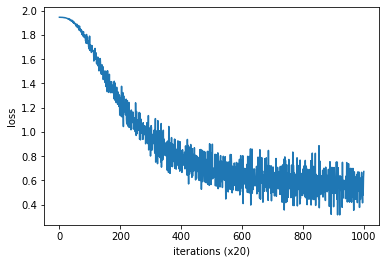

In [7]:
model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [8]:
word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])

you [ 0.98361415 -1.0505264   1.0874391   1.1336651   1.3596696 ]
say [-1.2231832   1.2112882  -1.1467588  -0.29532778  0.10645495]
goodbye [ 0.7429681  -0.67410254  0.7535216   0.8487165   0.613469  ]
and [-0.90889    0.8972336 -1.0003698 -1.5299736  1.6272026]
i [ 0.7546214  -0.68893015  0.75290996  0.8591309   0.61288923]
hello [ 1.0043734 -1.0471036  1.089142   1.1414292  1.3426186]
. [-1.1405921   1.1516751  -0.99968636  1.5944444  -1.3832362 ]
